In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [245]:
df = pd.read_csv('force2020_data.csv')

In [246]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [247]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18265    False
18266    False
18267    False
18268    False
18269    False
Length: 18270, dtype: bool

In [248]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [249]:
df['NPHI'] = df['NPHI'].fillna(df['NPHI'].mean())

In [250]:
df['PEF'] = df['PEF'].fillna(df['PEF'].mean())

In [251]:
df['DTC'] = df['DTC'].fillna(df['DTC'].mean())

In [252]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [253]:
def remove_outliers(df,column_name):
    q1=df[column_name].quantile(0.25)
    q3=df[column_name].quantile(0.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df[column_name]=df[column_name].clip(upper=upper_bound)
    df[column_name]=df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [254]:
num_cols = df.columns.tolist()
print(num_cols)

['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']


In [255]:
for col in num_cols:
    df[col]=remove_outliers(df,col)

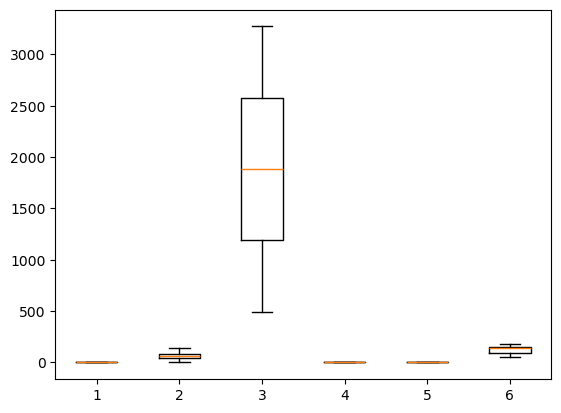

In [256]:
plt.boxplot(df)
plt.show()

In [257]:
minmax_scaled = MinMaxScaler(feature_range=(0,1))
df[['RHOB','GR','DEPTH_MD','PEF','DTC','NPHI']] = minmax_scaled.fit_transform(df[['RHOB','GR','DEPTH_MD','PEF','DTC','NPHI']])
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.561250,0.000000,0.477337,1.0,0.876716
1,0.318528,0.554137,0.000055,0.477337,1.0,0.872327
2,0.322946,0.520460,0.000109,0.477337,1.0,0.868752
3,0.319919,0.505724,0.000164,0.477337,1.0,0.868550
4,0.312121,0.497005,0.000219,0.477337,1.0,0.868375


In [258]:
X = df[['RHOB','DEPTH_MD',]]
X.head(3)

,RHOB,DEPTH_MD
0,0.314847,0.000000
1,0.318528,0.000055
2,0.322946,0.000109


In [259]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

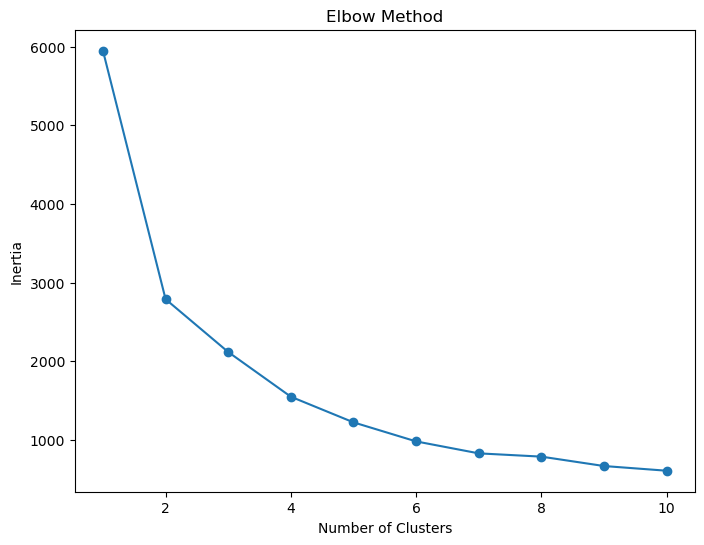

In [260]:
plt.figure(figsize = (8,6))
plt.plot(range(1,11), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [261]:
y_kmeans = kmeans.fit_predict(X)

In [262]:
df['cluster'] = y_kmeans

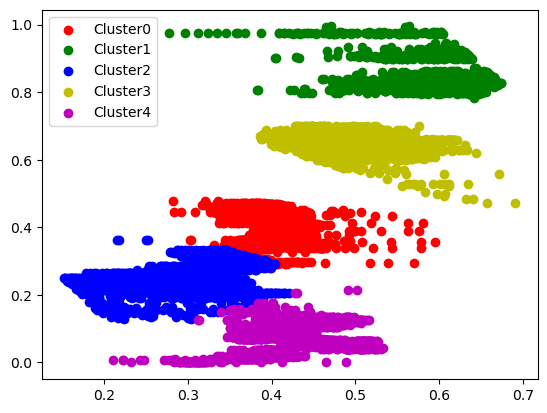

In [263]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['DEPTH_MD'],
              
              
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [264]:
def predict_cluster(RHOB,DEPTH_MD):
  new_data = [[RHOB,DEPTH_MD]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [265]:
# example
new_data_RHOB = 290
new_data_DEPTH_MD = 24

predicted_cluster = predict_cluster(new_data_RHOB,new_data_DEPTH_MD)
print(f'The data belongs to cluster: {predicted_cluster}')

The data belongs to cluster: 7


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score
  #Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

In [ ]:
k_values = range(2, 6)  # Experiment with 2 to 5 clusters

# Create subplots for visualizing results for different K
plt.figure(figsize=(15, len(k_values) * 5))
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']  # Adjust if more clusters are needed

for idx, k in enumerate(k_values, 1):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(df)

    # Plot the clusters
    plt.subplot(len(k_values), 1, idx)
    for i in range(k):
        cluster_data = X[y_kmeans == i]  # Group data by cluster
        plt.scatter(
            cluster_data['RHOB'],
            cluster_data['DEPTH_MD'],
            c=colors[i % len(colors)],  # Cycle through colors
            label=f'Cluster {i}',
            s=30
        )
    
    plt.title(f"K-Means Clustering with K={k}")
    plt.xlabel('RHOB')
    plt.ylabel('DEPTH_MD')
    plt.legend()

plt.tight_layout()
plt.show()